In [ ]:
#Laminar flat channel flow with constant mass pressure gradient

Channel flow with constant $dP/dx$. The channel height is 2 and $-L<y<L$. 
The ODE equation is
\begin{equation}
\mu \frac{\partial^2 u}{\partial y^2}=-\frac{dP}{dx}
\end{equation}
Two set of boundary conditions:\
Set 1. $u(-1)=u(1)=0$ Homogeneous BC \
Set 2. $u(-1)=0$ and $u(1)=u_0$


In [218]:
#Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [219]:
#Preliminary Data
L=1
mu=0.2
y=np.linspace(-L,L,100)
dp=-1 #Negative
u0=1

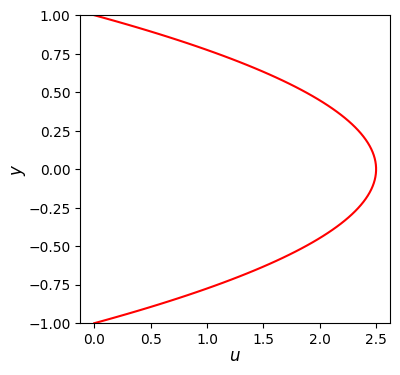

In [226]:
#Set 1
#Analitical solution
u= -dp*L**2/(2*mu)*(1-y**2/L**2)

fig=plt.figure(figsize=(4,4))
ax=plt.subplot(111)
plt.plot(u,y,color='red',linewidth=1.5)
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show()

In [221]:
#Two linear elements
n=2
l=2
p=(l-1)*n+1
h=2*L/n
#We write the stiffness matrix for a single element
Ke=mu/h*np.array([[1, -1],[-1, 1]])

In [222]:
#We compute the entire matrix
Diag=np.append(np.append(1,2*np.ones((p-2))),1)

K=mu/h*(sp.spdiags(-1*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(Diag,0,p,p))

K=K.toarray()
print(K)
K.shape

[[ 0.2 -0.2  0. ]
 [-0.2  0.4 -0.2]
 [ 0.  -0.2  0.2]]


(3, 3)

In [223]:
#We ammply the boundary conditions

K[0,:]=np.append(1, np.zeros(p-1))
K[-1,:]=np.append(np.zeros(p-1),1)

print(K)

[[ 1.   0.   0. ]
 [-0.2  0.4 -0.2]
 [ 0.   0.   1. ]]


In [224]:
#We apply the forcing term

f=-dp*h/2*Diag
f[0]=0
f[-1]=0

[0.  2.5 0. ]


<function matplotlib.pyplot.show(close=None, block=None)>

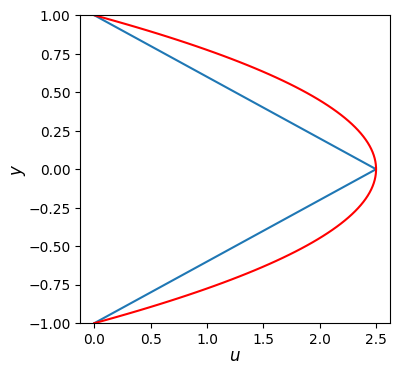

In [225]:
#We solve the linear algebra system
un=np.linalg.solve(K,f)
print(un)

#To plot we firsly take the points of the mesh
xn=np.linspace(-L,L,p)
fig=plt.figure(figsize=(4,4))
plt.plot(un,xn)
plt.plot(u,y,color='red')
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show

In [ ]:
#What happens if we increase the number of elements??
#We run again the code for n=2,4,6,10
fig=plt.figure(figsize=(4,4))

for n in np.array([2 , 4, 6, 10]):
    l=2
    p=(l-1)*n+1
    h=2*L/n
    Diag=np.append(np.append(1,2*np.ones((p-2))),1)
    K=mu/h*(sp.spdiags(-1*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(Diag,0,p,p))
    K=K.toarray()

    K[0,:]=np.append(1, np.zeros(p-1))
    K[-1,:]=np.append(np.zeros(p-1),1)

    f=-dp*h/2*Diag
    f[0]=0
    f[-1]=0

    un=np.linalg.solve(K,f)

#To plot we firsly take the points of the mesh
    xn=np.linspace(-L,L,p)
    plt.plot(un,xn)
plt.plot(u,y,color='red')
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show


We now study the second dataset

In [ ]:
#We run again the code for n=4

#Preliminary Data
L=1
mu=0.5
y=np.linspace(-L,L,100)
dp=-2 #Negative
u0=2
fig=plt.figure(figsize=(4,4))

n=4
l=2
p=(l-1)*n+1
h=2*L/n
Diag=np.append(np.append(1,2*np.ones((p-2))),1)
K=mu/h*(sp.spdiags(-1*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(Diag,0,p,p))
K=K.toarray()

K[0,:]=np.append(1, np.zeros(p-1))
K[-1,:]=np.append(np.zeros(p-1),1)

f=-dp*h/2*Diag
f[0]=0
f[-1]=u0

un=np.linalg.solve(K,f)

#To plot we firsly take the points of the mesh
xn=np.linspace(-L,L,p)
plt.plot(un,xn)
y=np.linspace(-L,L,100)
u=u0/2*(1+y/L)-dp*L**2/(2*mu)*(1-y**2/L**2)
plt.plot(u,y,color='red')
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show

We now solve the same problem with the quadratic elements

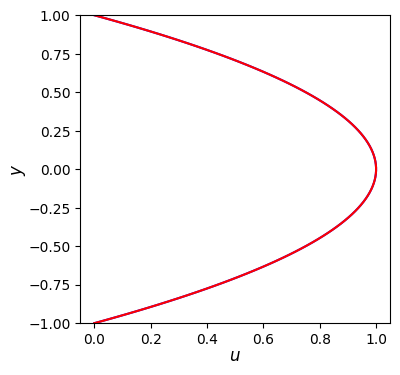

In [217]:
#We run again the code for n=1
fig=plt.figure(figsize=(4,4))
dp=-1
n=1
l=3
p=(l-1)*n+1
h=2*L/n


Ke=np.array([[7, -8, 1], [-8, 16, -8], [1, -8, 7]])
Diag=np.diag(Ke)
for j in range(n-1):
    Diag=np.concatenate((Diag[:-1], Diag[-1]+Diag[0],Diag[1:]),axis=None)


K=mu/(3*h)*(sp.spdiags(-8*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(Diag,0,p,p)+sp.spdiags(np.ones((2,p)),[-2, 2],p,p))
K=K.toarray()

K[0,:]=np.append(1, np.zeros(p-1))
K[-1,:]=np.append(np.zeros(p-1),1)

fe=-dp*h/6*np.array([1, 4, 1])
for j in range(n-1):
    fe=np.concatenate((fe[:-1], fe[-1]+fe[0],fe[1:]),axis=None)
fe[0]=0
fe[-1]=0


un=np.linalg.solve(K,fe)
u= -dp*L**2/(2*mu)*(1-y**2/L**2)

#To plot we firsly take the points of the mesh
xn=np.linspace(-L,L,p)
y=np.linspace(-L,L,100)
Un=np.zeros(100,);

for jj in range(0,l) :
    phi=1
    for ii in range(0,l):
        if ii  != jj:
            phi= phi * (y-xn[ii])/(xn[jj]-xn[ii])
            
    Un=Un+un[jj]*phi


plt.plot(Un,y,color='blue')
plt.plot(u,y,color='red')
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show()